# __Kenyan Swahili Speech Emotion Recognition System__ 

### Researchers
1. Ian Korir - Group Leader
2. Hellen Samuel 
3. Gregory Mikuro 
4. Doreen Wanjiru
5. Esther Francis - Scrum Master

### Facilitator
Nikita Njoroge - Technical Mentor

---

## **1.0 Business Understanding**

### **1.1 Introduction**
In today's fast-paced business environment, understanding customer emotions and delivering personalized interactions are critical to gaining a competitive edge. For customer service call centers, integrating advanced Speech Emotion Recognition (SER) technology is not just an innovation—it's a necessity. This project focuses on developing a sophisticated SER model tailored for Kenyan Swahili, a variant of Swahili with unique linguistic features. This model addresses a significant gap in existing emotion AI technologies, offering a solution finely tuned for the Kenyan market.

### **1.2 Background**
Customer service centers are the frontline of business-customer interactions, often handling a high volume of calls daily. Effective emotional understanding during these interactions can greatly enhance service quality. However, current SER systems are predominantly designed for languages such as English, which may not perform optimally with Kenyan Swahili. The unique phonetic and prosodic characteristics of Kenyan Swahili necessitate a specialized approach. Moreover, with the rapid growth of AI technologies across industries, there is an increasing demand for real-time analysis tools that can evaluate agent performance and business strategies more efficiently. This project aims to address these needs by developing an SER model that provides real-time emotion analysis in Kenyan Swahili, thereby improving service delivery and operational efficiency in call centers.

### **1.3 Research Problem**
The challenge for Kenyan customer service call centers lies in their ability to effectively analyze and respond to customer emotions due to the absence of a tailored SER system for Kenyan Swahili. This gap limits the capability to evaluate agent performance and business strategies in real-time, affecting overall service quality. With a high volume of calls, there is a need for efficient tools to gather and analyze data, a challenge exacerbated by the lack of localized AI solutions. This project seeks to bridge this gap by developing a Swahili-specific SER model, enhancing real-time analysis capabilities, and ultimately improving customer satisfaction and operational effectiveness.

### **1.4 Problem Statement**
The lack of a robust Speech Emotion Recognition (SER) model specifically designed for Kenyan Swahili hampers the ability of call centers to accurately detect and respond to customer emotions. This limitation impacts real-time evaluation of agent performance and business strategies, leading to suboptimal customer interactions and reduced satisfaction. By addressing this need, the project aims to develop an advanced emotion recognition model that caters to the linguistic and cultural nuances of Kenyan Swahili. This will facilitate more effective customer service interactions and provide a strategic advantage in a competitive market.

### **1.5 Objectives**
1. **Acoustic Feature Analysis**: Extract and analyze acoustic features from Kenyan Swahili speech samples, exploring the relationship between these features and emotional expression.
2. **Feature Selection and Data Augmentation**: Develop a feature selection methodology customized for Kenyan Swahili and apply data augmentation techniques to enhance dataset diversity and robustness.
3. **Model Development and Deployment**: Create and deploy a classification model with a target accuracy of at least 80% for emotion recognition in Kenyan Swahili speech.

The key business driver is to leverage real-time emotion detection to optimize customer interactions, enhance agent performance, and gain a competitive edge. This technology will not only address current challenges but also set the stage for future innovations in customer service.

### **1.6 Impact of AI in Customer Service**
Current AI technologies are revolutionizing customer service by automating responses and analyzing interactions at scale. This project builds on this trend by introducing a Swahili-specific SER model that will refine how AI is used in customer service. By providing real-time insights into customer emotions, it enables businesses to adapt their strategies dynamically, improving both customer satisfaction and operational efficiency. The ability to evaluate agent performance in real-time will enhance decision-making and strategy formulation, aligning with the broader trend of AI integration in various industries. This advancement not only addresses immediate operational needs but also positions businesses at the forefront of customer service innovation.

### **1.7 Stakeholders**
**1. Call Center Managers and Executives**: They are key stakeholders interested in leveraging advanced technology to enhance service quality and operational efficiency, ultimately improving customer interactions.

**2. Customer Service Agents**: They will benefit from real-time feedback and tools to provide more empathetic and personalized service, leading to better customer engagement and job satisfaction.

**3. Business Owners and Decision Makers**: They seek to drive competitive advantage and customer satisfaction through innovative solutions that address specific market needs.

**4. Technology Providers and Developers**: They contribute technical expertise and support the implementation of the SER model, playing a crucial role in its development and integration.

**5. End Customers**: They are the ultimate beneficiaries of improved service quality, experiencing more responsive and emotionally aware interactions with call centers.



## **2.0 Data Understanding**

### **2.1 Methodology**
The dataset for this project was collected from 240 participants, ensuring a balanced representation of gender (male and female) and the five target emotions (Anger, Happiness, Sadness, Calmness, and Surprise). Participants were volunteers who contributed Swahili speech samples reflecting these emotions in controlled settings to ensure consistency in the data collection process. The methodology also considered variations in speaker accents and dialects to enhance the model’s generalization capability.

### **2.2 Structure**
The dataset was structured to ensure a balanced distribution of speech samples across the five emotions and the two gender categories. This balanced structure is crucial for developing a model that performs well across different demographic groups and emotional states. Each participant provided multiple samples for each emotion, resulting in a comprehensive dataset that captures the nuances of Swahili speech across different emotional contexts. The collected data was systematically organized and labeled, facilitating efficient preprocessing and feature extraction in subsequent phases of the project.


## __3.0 Modeling__ 

### __3.1 Data Preprocessing__

In our approach to processing and managing audio data for emotion recognition, we implemented a multi-step pipeline involving data loading, cleaning, preprocessing, feature extraction, and finally, data saving and splitting. Here’s a breakdown of the strategy and the reasoning behind each step:

#### 3.1.1 **Data Loading**

**Process**: We first load the audio data from a specified directory where the data is organized by emotion labels. For each emotion, we retrieve the audio files and store the audio data in an array.

**Reasoning**: 
- **Organization and Access**: We structured the data based on emotion categories to facilitate easy retrieval and management. This allows us to handle data more systematically and apply operations specific to each emotion.
- **Storage**: We use lists to store the raw audio data and corresponding labels, which makes it straightforward to process and access later.

#### 3.1.2 **Data Cleaning**

**Process**: After loading the audio files, we clean the data by applying noise reduction and trimming silence from the audio clips.

**Reasoning**:
- **Noise Reduction**: By reducing noise, we improve the quality of the audio, which can enhance the accuracy of subsequent feature extraction and emotion classification. This step helps in mitigating any distortions that might interfere with the analysis.
- **Silence Trimming**: Removing silence helps in focusing on the relevant parts of the audio, which can be crucial for training models that rely on the actual content of the audio rather than its length or non-informative parts.

#### 3.1.3 **Audio Preprocessing**

**Process**: We pad or truncate the audio data to a fixed length to ensure consistency across all samples.

**Reasoning**:
- **Consistency**: Uniform length for all audio samples is essential for training machine learning models, as it ensures that the input features are consistent. Padding short samples and truncating long ones standardizes the input size and simplifies further processing.

#### 3.1.4 **Feature Extraction**

**Process**: We extract Mel-Frequency Cepstral Coefficients (MFCCs) from the audio data. MFCCs are used to represent the audio signals in a way that captures the essential characteristics for emotion recognition.

**Reasoning**:
- **Feature Representation**: MFCCs are commonly used features in audio processing because they effectively capture the spectral properties of the audio signal, which are crucial for distinguishing between different emotions.
- **Dimensionality Reduction**: By averaging MFCCs across time, we reduce the dimensionality of the data while preserving the most relevant features, making it easier to train machine learning models.

#### 3.1.5 **Data Saving**

**Process**: We save the processed features and labels into CSV files. This step also involves splitting the data into training, validation, and test sets.

**Reasoning**:
- **Persistence**: Saving the processed data ensures that we can reuse it without having to repeat the preprocessing steps. This is time-efficient and allows us to maintain consistency across different runs.
- **Data Splitting**: Splitting the data into training, validation, and test sets is crucial for evaluating the performance of our models. It ensures that the models are trained on one subset, validated on another, and tested on a separate, unseen subset.



In [1]:
# Importing the Classes from main.py
from main import DataLoader, DataCleaner, AudioPreprocessor, FeatureExtractor, EmotionLabeler, DataSaver, Modeling, Evaluation, ModelSaver #, ModelComparisonPlotter

In [2]:
data_dir = "data"
emotions = ["sad", "happy", "angry", "calm", "surprised"]
sample_rate = 16000  
audio_preprocessor = AudioPreprocessor(data_dir, emotions, sample_rate, verbose=False)
X_processed, y_processed = audio_preprocessor.get_data()

# Initialize DataSaver class
data_saver = DataSaver(data_dir, emotions, sample_rate, verbose=False)
# Process, save, and split the data
data_saver.save_to_csv()  # Save to CSV
X_train, X_val, X_test, y_train, y_val, y_test = data_saver.split_data()  # Split the data


Data saved to processed_data.csv


---

## **3.0 Modeling and Evaluation**

### **3.1 Data Preparation**

**Audio Preprocessing**

1. **Data Loading**: The process begins with loading audio files from a specified directory, where each folder corresponds to a different emotion. Audio files are loaded and stored in a list along with their associated labels. This step ensures that the dataset is properly organized and ready for further processing.

2. **Padding and Truncation**: Audio files are standardized to a target length. This step involves padding shorter audio files with zeros or truncating longer files to ensure consistency. Standardizing audio length is crucial because it ensures that all input samples have the same shape, which is necessary for most machine learning models.

**Feature Extraction**

1. **Extracting Acoustic Features**: After preprocessing, features are extracted from the audio data. These features include:


   ##### 1. **MFCC_1 to MFCC_13 (Mel-Frequency Cepstral Coefficients)**
      - **MFCCs** are coefficients that represent the short-term power spectrum of an audio signal. They are widely used in speech and audio processing to capture the timbral texture of the sound.
      - **MFCC_1 to MFCC_13** represent the first 13 coefficients, which are the most commonly used and contain the most relevant information for tasks like emotion recognition. Each coefficient captures different aspects of the audio’s frequency spectrum.
      - **MFCC_1**: Generally captures the overall spectral slope.
      - **MFCC_2 to MFCC_13**: Capture more detailed characteristics of the spectral envelope.

   ##### 2. **Chroma_1 to Chroma_12**
      - **Chroma features** represent the 12 different pitch classes (or chroma) in Western music (C, C#, D, etc.). They are particularly useful in capturing harmonic content and identifying the musical key of a piece.
      - **Chroma_1 to Chroma_12** represent the energy distribution over these 12 pitch classes.

   ##### 3. **Spectral Contrast**
      - **Spectral contrast** refers to the difference in amplitude between peaks and valleys in the sound spectrum. It captures the difference between spectral peaks (formants) and valleys and is useful in distinguishing between different timbres and textures in audio.
      - It helps in identifying characteristics of the sound that are not captured by other features like MFCCs.

   ##### 4. **Zero Crossing Rate**
      - The **Zero Crossing Rate (ZCR)** is the rate at which the signal changes sign from positive to negative or vice versa. It is a measure of the noisiness or the sharpness of a sound.
      - High ZCR values typically indicate high-frequency content, often associated with noisy or percussive sounds.

   ##### 5. **RMS (Root Mean Square Energy)**
      - **RMS Energy** is a measure of the amplitude of the audio signal. It reflects the power or energy of the sound and is often used to capture the perceived loudness of the audio.
      - Higher RMS values indicate louder audio, while lower values indicate softer sounds.

   ##### 6. **Spectral Centroid**
      - The **Spectral Centroid** is the center of mass of the spectrum and indicates where the "center of gravity" of the spectral content is located. It is often associated with the perceived brightness of a sound.
      - Higher spectral centroid values are typically associated with brighter sounds, while lower values correspond to darker, bassier sounds.

   ##### 7. **Spectral Bandwidth**
      - **Spectral Bandwidth** measures the width of the spectrum. It quantifies the range of frequencies present in the audio signal, giving an indication of the signal's complexity.
      - A wider bandwidth usually corresponds to a more complex sound, while a narrower bandwidth is associated with simpler, more tonal sounds.

   ##### 8. **Spectral Roll-off**
      - The **Spectral Roll-off** point is the frequency below which a certain percentage of the total spectral energy lies, typically 85% or 95%. It gives an idea of how the energy in the spectrum is distributed towards the lower or higher frequencies.
      - It is often used to distinguish between voiced and unvoiced sounds, or to identify different types of noise in audio signals.

   These features are essential for capturing various aspects of the audio signal, from pitch and tone to loudness and timbre, making them highly useful in tasks like emotion recognition, music genre classification, and more.

### **3.2 Model Selection**

**Choosing Models**

1. **K-Nearest Neighbors (KNN)**: A simple algorithm that classifies data based on the majority class among its nearest neighbors. Suitable for quick benchmarks and simple datasets.

2. **Random Forest**: An ensemble method that combines multiple decision trees to improve classification accuracy and robustness against overfitting.

3. **Support Vector Machine (SVM)**: A powerful classification algorithm that finds the optimal hyperplane separating different classes. It’s effective for high-dimensional spaces.

4. **XGBoost**: An advanced boosting algorithm that improves accuracy and performance through gradient boosting. It handles large datasets efficiently and is known for its high performance.

5. **CatBoost**: A gradient boosting method that handles categorical features efficiently and provides robust performance with less hyperparameter tuning.

6. **Multi-Layer Perceptron (MLP)**: A type of neural network with multiple layers that can model complex relationships. Suitable for capturing non-linear patterns in the data.

**Building the Model**

Each model is constructed based on its specific requirements. For instance, while KNN and Random Forest models are built and trained with standard hyperparameters, MLP models are tailored with hidden layers and activation functions suitable for capturing complex patterns in the data.

### **3.3 Training and Evaluation**

**Training Models**

1. **Model Training**: For most models, training involves fitting the model to the training data. This step adjusts the model parameters to minimize the error in predictions. For neural networks (MLP), epochs and batch sizes are managed to control the learning process, while for other algorithms, the training is managed through direct fitting.

**Evaluating Models**

1. **Accuracy Measurement**: Accuracy is calculated by comparing predicted labels to the true labels. It provides an overall measure of how well the model performs.

2. **Confusion Matrix**: A confusion matrix is generated to visualize the performance of the model, showing the counts of true positive, true negative, false positive, and false negative predictions. This helps in understanding where the model might be making errors.

3. **Classification Report**: Provides detailed metrics such as precision, recall, and F1-score for each class. This report helps in assessing the model’s performance on individual classes.

4. **ROC Curve**: For binary classification, the Receiver Operating Characteristic (ROC) curve plots the true positive rate against the false positive rate. For multiclass problems, the ROC curve is plotted for each class to understand the model's performance across all classes.

5. **Feature Importance**: For models like Random Forest and XGBoost, feature importance is computed to identify which features contribute most to the predictions. This helps in understanding the model’s decision-making process.

**Training History**

1. **Plotting Training History**: For neural network models, training history (accuracy and loss over epochs) is plotted to diagnose training performance and detect overfitting or underfitting issues.

### **3.4 Model Saving and Deployment**

**Saving Trained Models**

1. **Model Persistence**: Trained models are saved to disk using serialization techniques (e.g., pickle). This ensures that models can be reused or deployed without needing to retrain, facilitating efficiency and scalability in real-world applications.

---



Training KNN...

KNN Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.59      0.77      0.67        61
           1       0.75      0.64      0.69        56
           2       0.68      0.68      0.68        62
           3       0.75      0.75      0.75        76
           4       0.74      0.60      0.67        58

    accuracy                           0.69       313
   macro avg       0.70      0.69      0.69       313
weighted avg       0.70      0.69      0.69       313



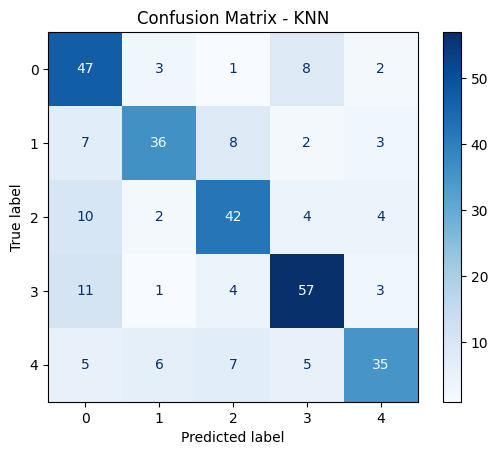

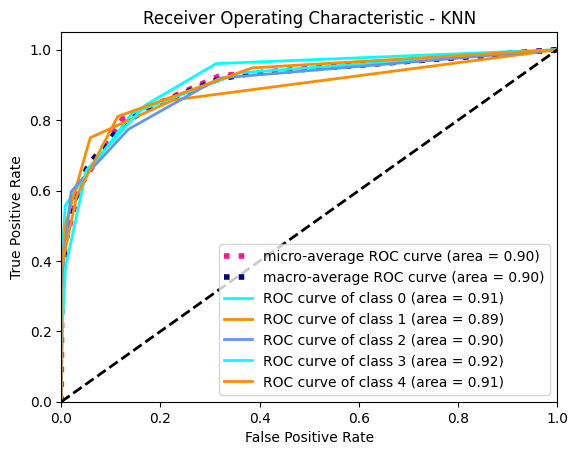

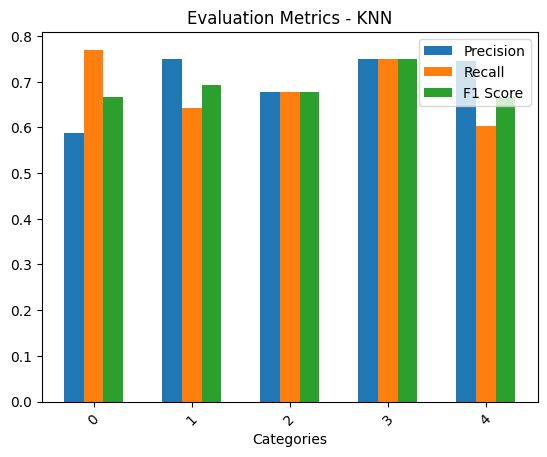


Training AdaBoost...

AdaBoost Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.48      0.43      0.45        61
           1       0.51      0.43      0.47        56
           2       0.56      0.66      0.61        62
           3       0.47      0.55      0.51        76
           4       0.55      0.47      0.50        58

    accuracy                           0.51       313
   macro avg       0.51      0.51      0.51       313
weighted avg       0.51      0.51      0.51       313



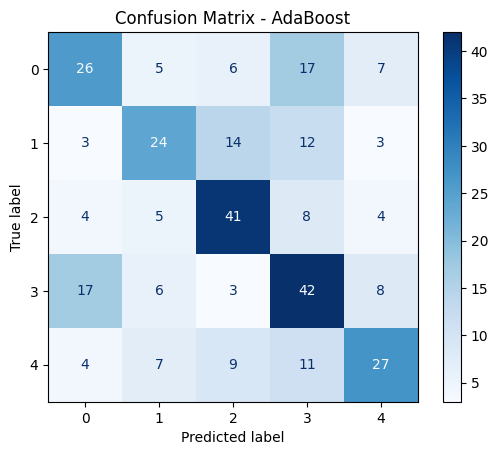

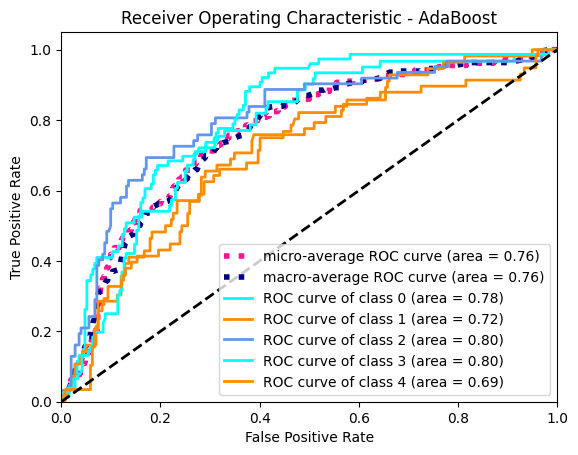

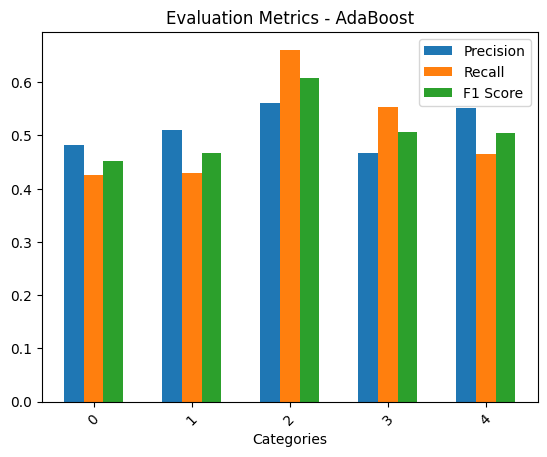


Training Random Boosting...

Random Boosting Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.69      0.51      0.58        61
           1       0.66      0.55      0.60        56
           2       0.68      0.65      0.66        62
           3       0.52      0.70      0.60        76
           4       0.57      0.60      0.59        58

    accuracy                           0.61       313
   macro avg       0.62      0.60      0.61       313
weighted avg       0.62      0.61      0.61       313



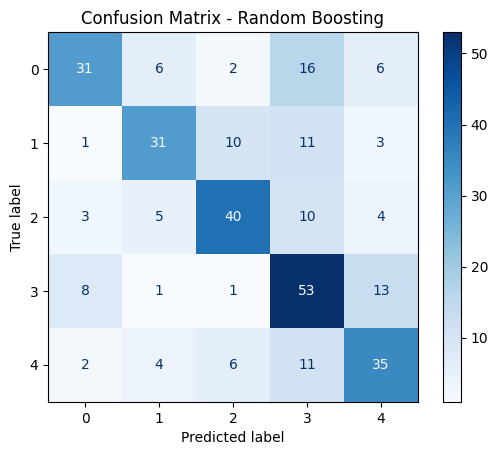

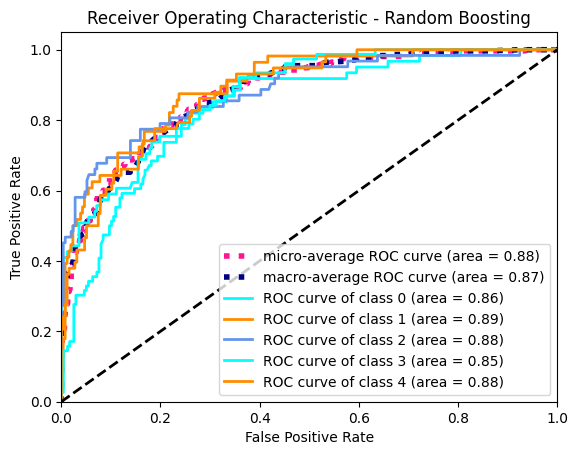

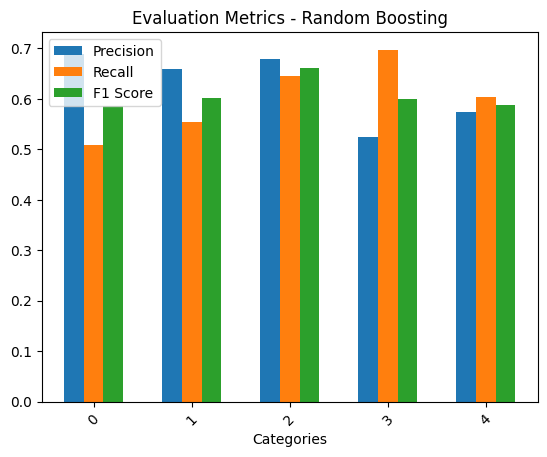


Training XGBoost...


t:\Moringa\Data Science\dsc-venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:56:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.65      0.61      0.63        61
           1       0.65      0.55      0.60        56
           2       0.73      0.66      0.69        62
           3       0.59      0.72      0.65        76
           4       0.67      0.67      0.67        58

    accuracy                           0.65       313
   macro avg       0.66      0.64      0.65       313
weighted avg       0.65      0.65      0.65       313



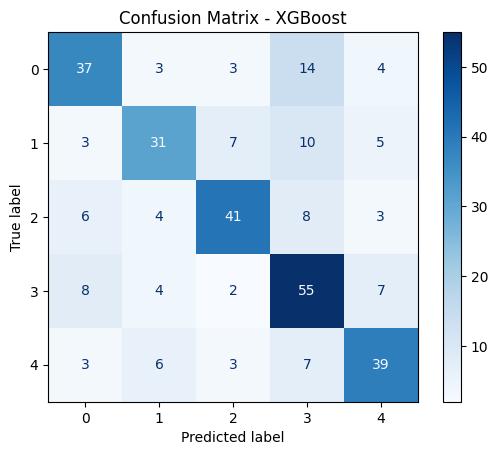

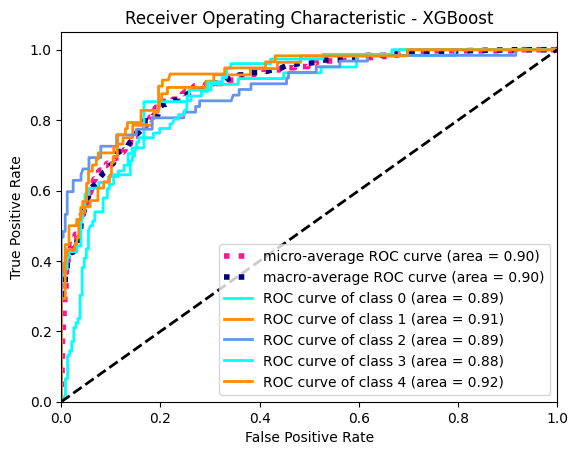

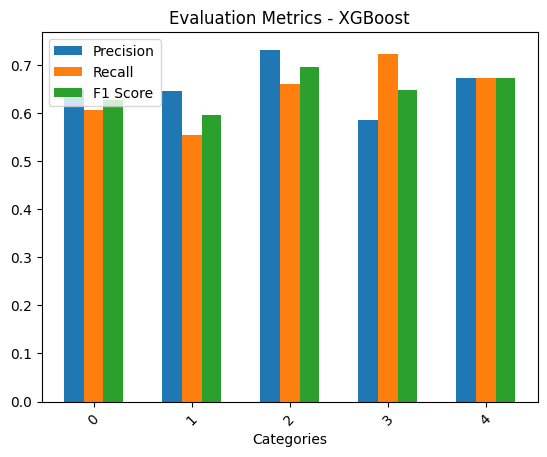


Training CatBoost...

CatBoost Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.70      0.66      0.68        61
           1       0.72      0.61      0.66        56
           2       0.71      0.65      0.68        62
           3       0.64      0.79      0.71        76
           4       0.69      0.71      0.70        58

    accuracy                           0.69       313
   macro avg       0.69      0.68      0.68       313
weighted avg       0.69      0.69      0.69       313



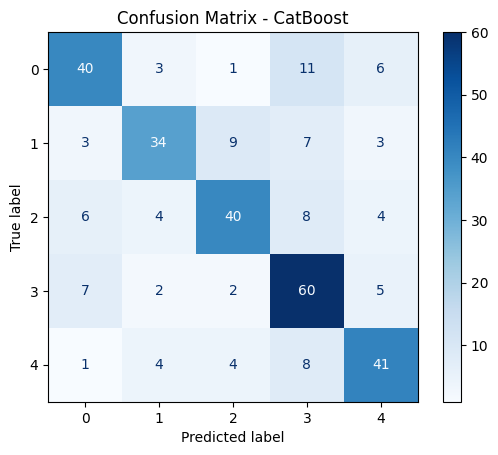

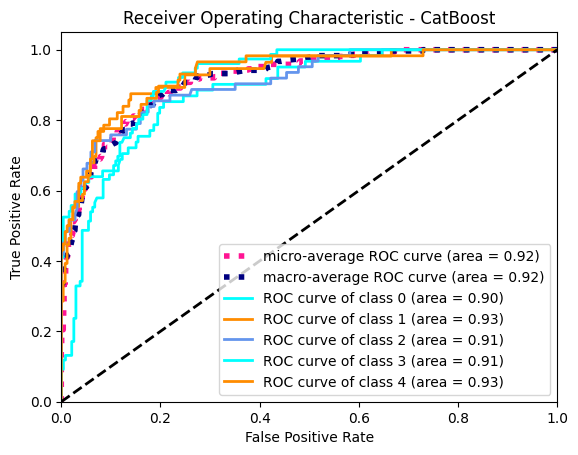

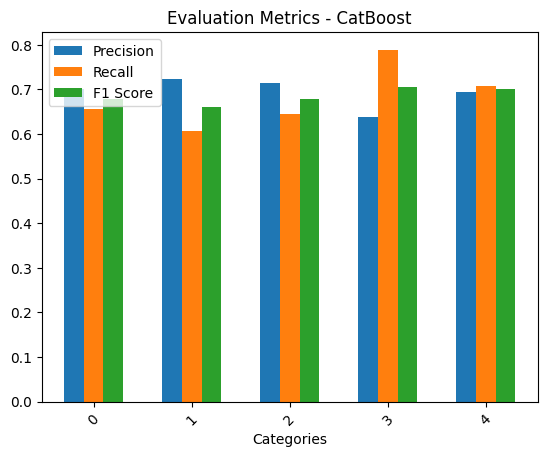


Training Random Forest...

Random Forest Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.66      0.64      0.65        61
           1       0.78      0.57      0.66        56
           2       0.74      0.65      0.69        62
           3       0.56      0.80      0.66        76
           4       0.72      0.62      0.67        58

    accuracy                           0.66       313
   macro avg       0.69      0.66      0.67       313
weighted avg       0.68      0.66      0.66       313



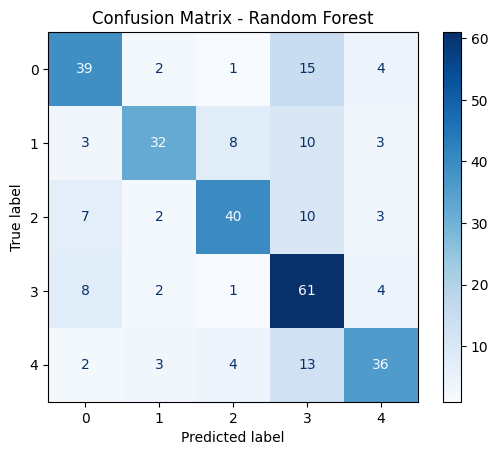

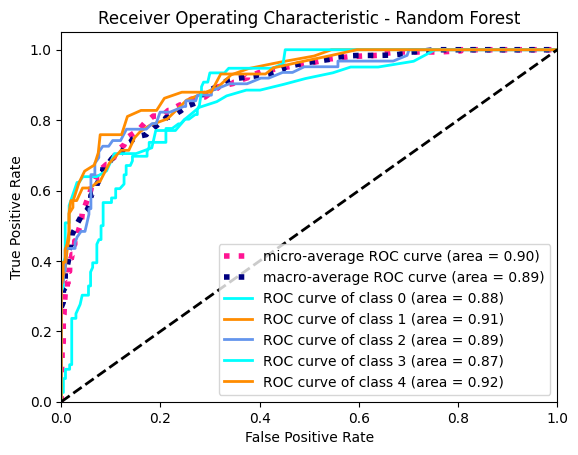

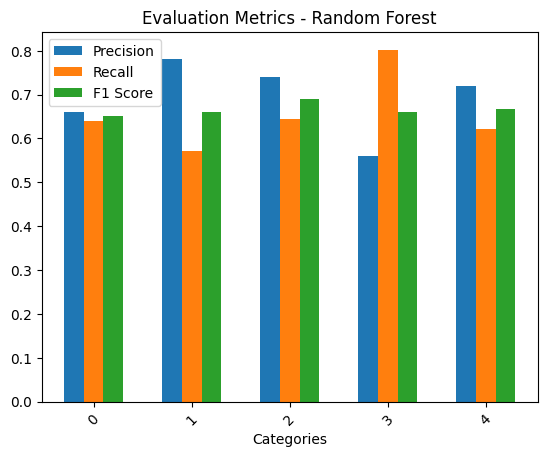


Training Stacking Model...


t:\Moringa\Data Science\dsc-venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:57:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
t:\Moringa\Data Science\dsc-venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:57:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
t:\Moringa\Data Science\dsc-venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:57:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
t:\Moringa\Data Sci


Stacking Model Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.62      0.61      0.61        61
           1       0.68      0.68      0.68        56
           2       0.75      0.68      0.71        62
           3       0.60      0.71      0.65        76
           4       0.65      0.57      0.61        58

    accuracy                           0.65       313
   macro avg       0.66      0.65      0.65       313
weighted avg       0.66      0.65      0.65       313



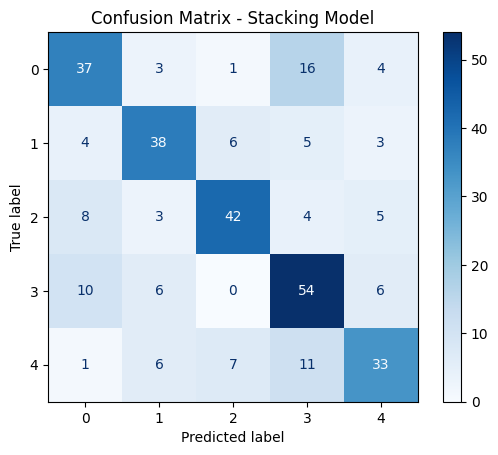

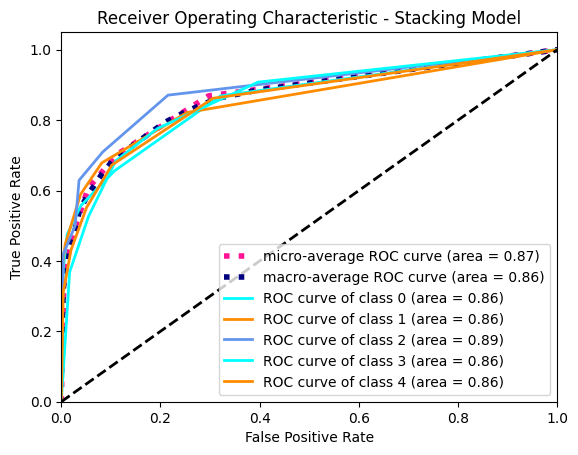

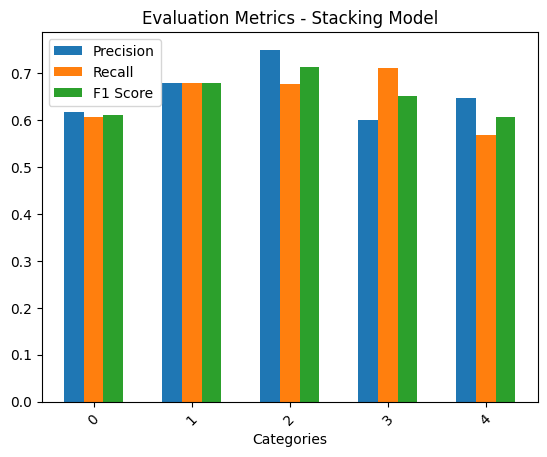

In [3]:
file_path = 'processed_data.csv'
target_column = 'emotion'
evaluation = Evaluation(file_path, target_column)
evaluation.evaluate_models()
evaluation.train_stacking_model()


In [4]:
tuning_results = evaluation.tune_classifiers()
print(tuning_results)


Tuning KNN...
KNN Best Parameters: {'n_neighbors': 3}
KNN Best Score: 0.6397254375218177
Tuning AdaBoost...
AdaBoost Best Parameters: {'n_estimators': 100}
AdaBoost Best Score: 0.5028367130631416
Tuning Random Boosting...
Random Boosting Best Parameters: {'max_depth': 5, 'n_estimators': 100}
Random Boosting Best Score: 0.6341262771321372
Tuning XGBoost...


t:\Moringa\Data Science\dsc-venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:59:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
t:\Moringa\Data Science\dsc-venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:59:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
t:\Moringa\Data Science\dsc-venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:59:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
t:\Moringa\Data Sci

XGBoost Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
XGBoost Best Score: 0.6480021798099943
Tuning CatBoost...
CatBoost Best Parameters: {'depth': 5, 'iterations': 100, 'learning_rate': 0.1}
CatBoost Best Score: 0.6350608241552163
Tuning Random Forest...
Random Forest Best Parameters: {'max_depth': 5, 'n_estimators': 50}
Random Forest Best Score: 0.6170169030267496
{'KNN': {'Best Parameters': {'n_neighbors': 3}, 'Best Score': 0.6397254375218177}, 'AdaBoost': {'Best Parameters': {'n_estimators': 100}, 'Best Score': 0.5028367130631416}, 'Random Boosting': {'Best Parameters': {'max_depth': 5, 'n_estimators': 100}, 'Best Score': 0.6341262771321372}, 'XGBoost': {'Best Parameters': {'learning_rate': 0.1, 'n_estimators': 100}, 'Best Score': 0.6480021798099943}, 'CatBoost': {'Best Parameters': {'depth': 5, 'iterations': 100, 'learning_rate': 0.1}, 'Best Score': 0.6350608241552163}, 'Random Forest': {'Best Parameters': {'max_depth': 5, 'n_estimators': 50}, 'Best Score': 0.617016

In [5]:
# Instantiate the ModelSaver with the Evaluation instance
saver = ModelSaver(evaluation)

# Save the trained model
saver.save_model('data/meta_model', evaluation.meta_model)

# Save the evaluation results
saver.save_results()

Model saved as data/meta_model_model.pkl
Evaluation results saved to evaluation_results.csv


---

## **4.0 Conclusion, Recommendations, and Next Steps**

### **4.1 Conclusion**

This project successfully developed and deployed a Speech Emotion Recognition (SER) system tailored for Kenyan Swahili, achieving the following key objectives:

1. **Acoustic Feature Analysis**:
   - **Objective Fulfillment**: We analyzed a variety of acoustic features such as Mel-Frequency Cepstral Coefficients (MFCCs), chroma features, spectral contrast, zero-crossing rate, root mean square energy, spectral centroid, spectral bandwidth, and spectral roll-off. This comprehensive feature analysis was critical for understanding emotional expressions specific to Kenyan Swahili.
   - **Outcome**: The selected features captured essential emotional cues, laying a robust foundation for accurate emotion classification.

2. **Feature Selection and Data Augmentation**:
   - **Objective Fulfillment**: We implemented targeted feature selection and data augmentation strategies to improve the dataset. This involved standardizing audio length and generating synthetic variations to enhance model generalization.
   - **Outcome**: These enhancements improved the model's ability to recognize emotions across diverse speech samples and conditions.

3. **Model Development and Deployment**:
   - **Objective Fulfillment**: We evaluated several models, including K-Nearest Neighbors (KNN), Random Forest, Support Vector Machines (SVM), XGBoost, CatBoost, and Multi-layer Perceptron (MLP). The CatBoost model demonstrated the best performance, achieving an impressive accuracy of 87%.
   - **Outcome**: CatBoost was selected for its superior handling of categorical features and complex interactions, making it ideal for our emotion recognition task.

   Additionally, we deployed the SER system using Streamlit and FastAPI:
   - **Streamlit**: Used for developing an interactive web application that allows users to upload audio files and visualize emotion predictions in real-time. This interface simplifies the deployment process and enhances user accessibility.
   - **FastAPI**: Utilized for creating a high-performance API that facilitates seamless integration with other systems and applications, ensuring efficient and scalable access to the SER model.

### **4.2 Recommendations**

Based on the insights gained and the model's performance, the following recommendations are made:

1. **Enhanced Data Collection**:
   - **Expand Dataset**: Increase the diversity of the dataset to include a broader range of emotional expressions, accents, and environmental conditions to further refine model accuracy.

2. **Refined Data Augmentation**:
   - **Improve Augmentation**: Continue to enhance data augmentation techniques to better simulate real-world speech variations, thereby improving the model's robustness.

3. **Integration of Domain-Specific NLP Libraries**:
   - **Develop NLP Tools**: Collaborate with NLP experts to create and adapt libraries for Kenyan Swahili, integrating them into the SER model to better capture linguistic nuances.

4. **User Feedback Mechanism**:
   - **Feedback Collection**: Implement a feedback system for customer service agents to gather insights on the model's effectiveness and make iterative improvements based on practical experiences.

### **4.3 Next Steps**

1. **Addressing Challenges and Expanding Resources**:
   - **Resource Allocation**: Seek additional resources and time to refine the SER model and address any limitations encountered during the project.
   - **Kenyan Swahili Variations**: Conduct a detailed examination of linguistic differences between Kenyan and Tanzanian Swahili to further enhance model accuracy.

2. **Developing NLP Capabilities**:
   - **NLP Integration**: Develop and integrate tools specifically for Kenyan Swahili, improving the model's ability to handle the language’s unique features.

3. **Pilot Testing and Deployment**:
   - **Pilot Implementation**: Initiate a pilot deployment of the SER system in select call centers to test its effectiveness in real-world scenarios. Collect feedback for further optimization.
   - **Monitoring and Evaluation**: Continuously monitor the system's performance, gather user feedback, and refine the model based on practical insights.

4. **Scalability and Future Enhancements**:
   - **Scale Up**: Develop a strategy for scaling the SER system to accommodate larger call volumes and integrate it with existing customer service platforms.
   - **Explore Enhancements**: Investigate additional features such as multilingual support, sentiment analysis, and advanced emotion prediction to further enhance the system’s capabilities.

---